In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_set = pd.read_csv('/content/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
training_set.describe(include=['O'])  # отображает статистику объектного типа (для нечисловых данных)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


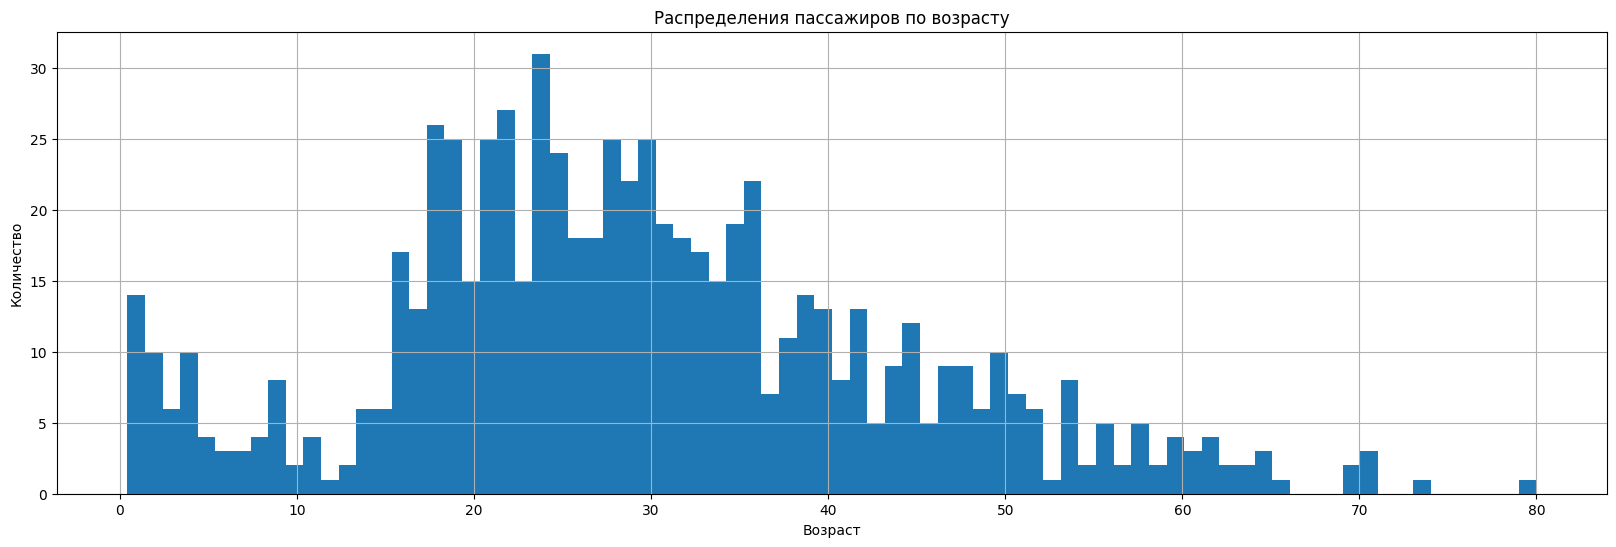

In [ ]:
# Гистограмма распределения признаков
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

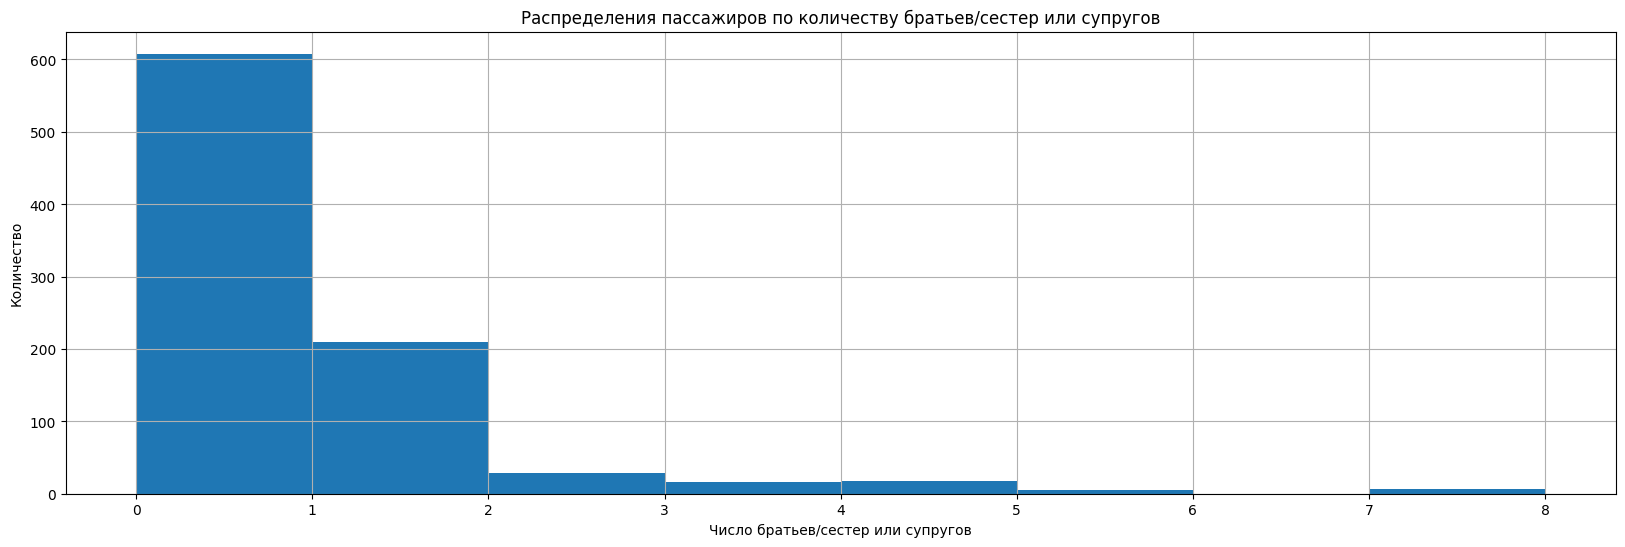

In [ ]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 'Число братьев/сестер или супругов')

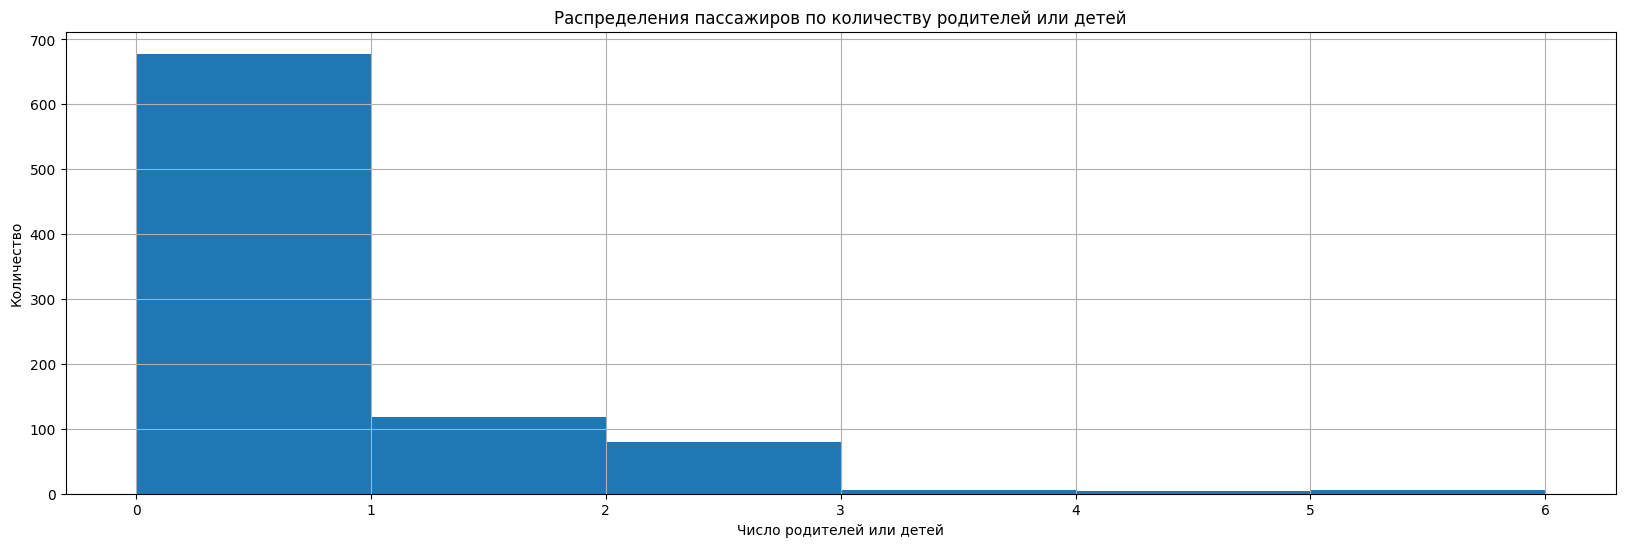

In [ ]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

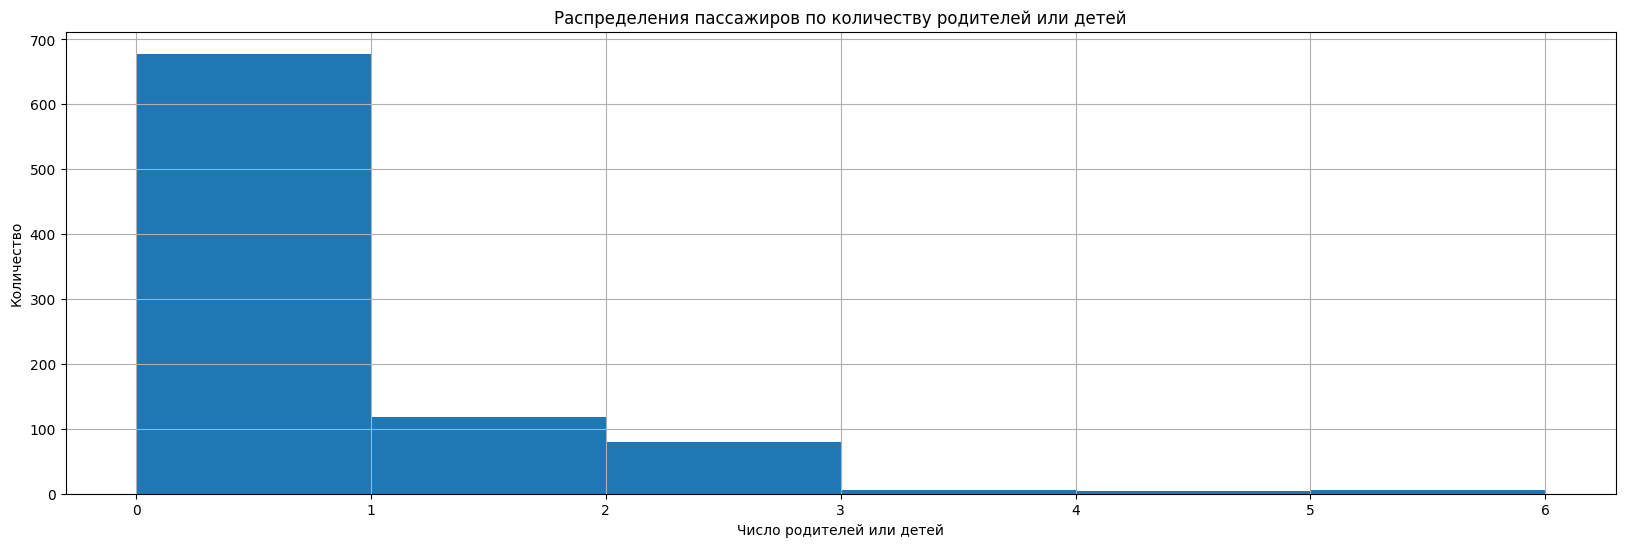

In [ ]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

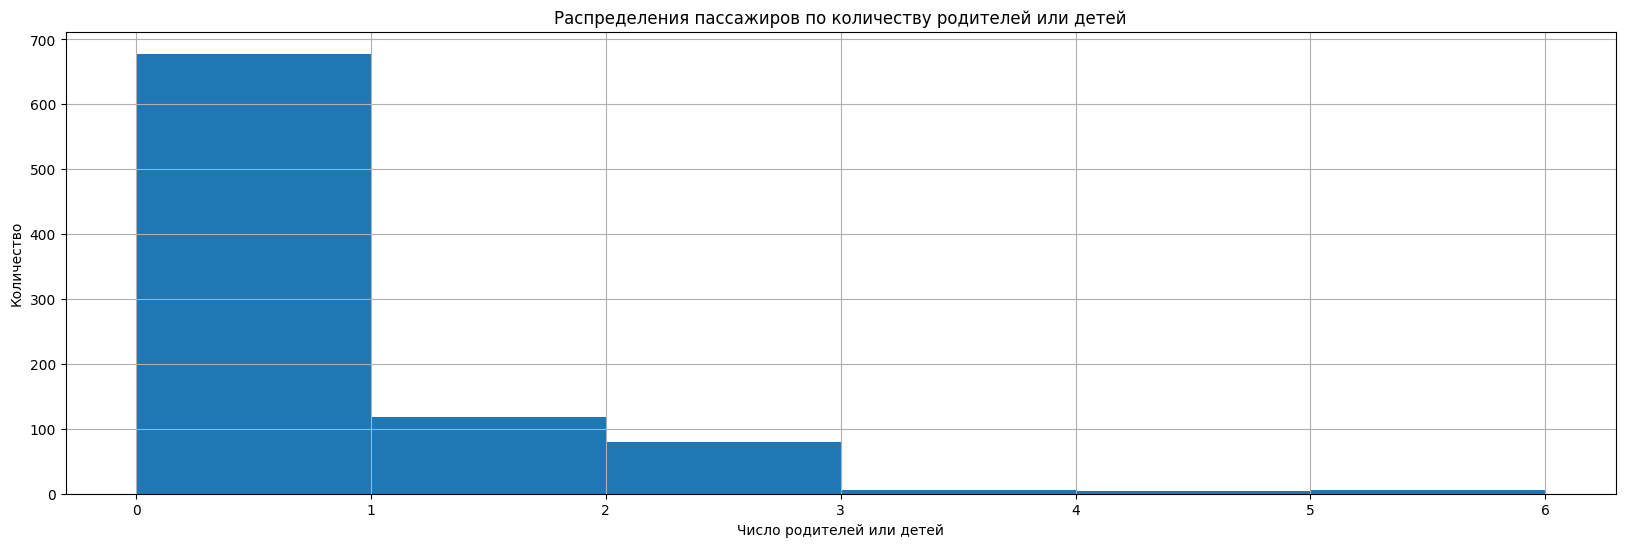

In [ ]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

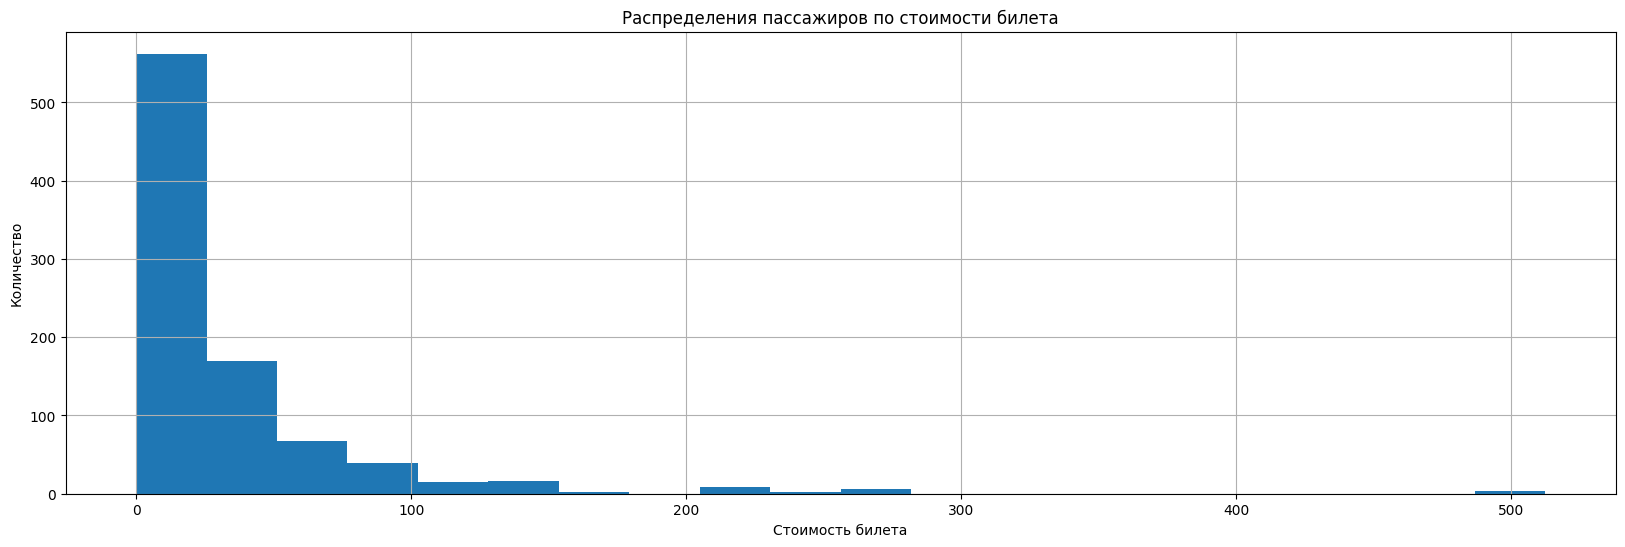

In [ ]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

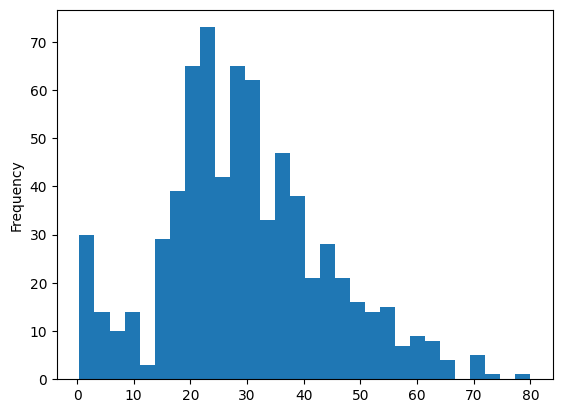

In [ ]:
training_set['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

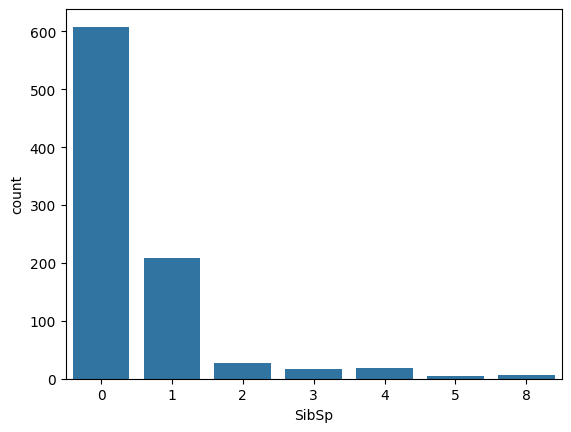

In [ ]:
sns.countplot(x='SibSp', data=training_set)

<Axes: >

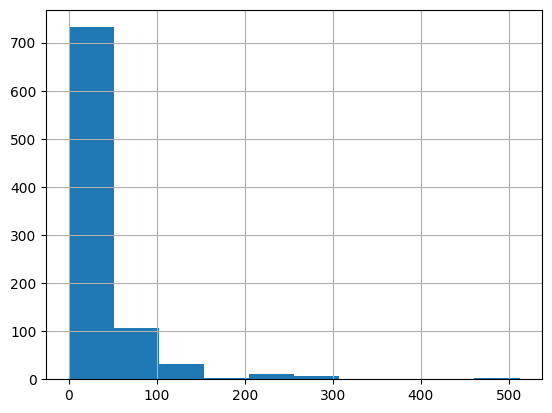

In [ ]:
training_set['Fare'].hist()

<Axes: >

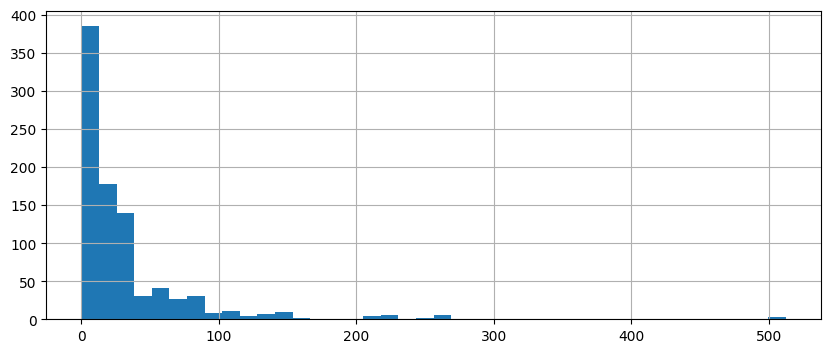

In [ ]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

<Axes: xlabel='Survived', ylabel='count'>

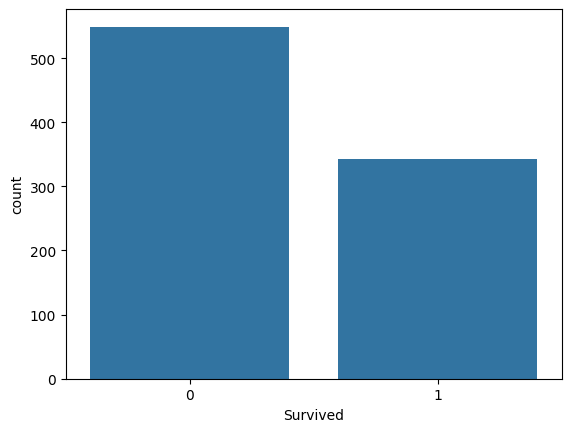

In [ ]:
# Установим соотношение выживших и не выживших
sns.countplot(x='Survived', data=training_set)

<Axes: xlabel='Survived', ylabel='count'>

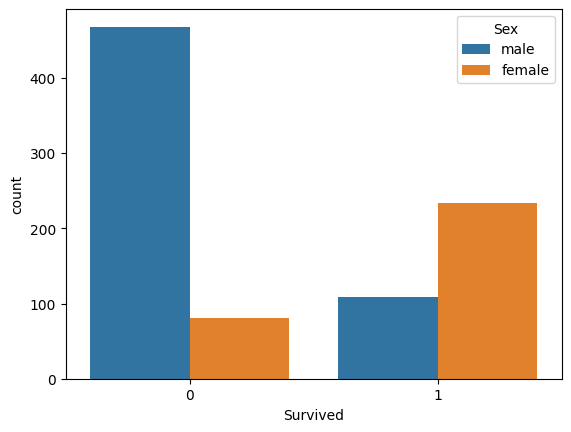

In [ ]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

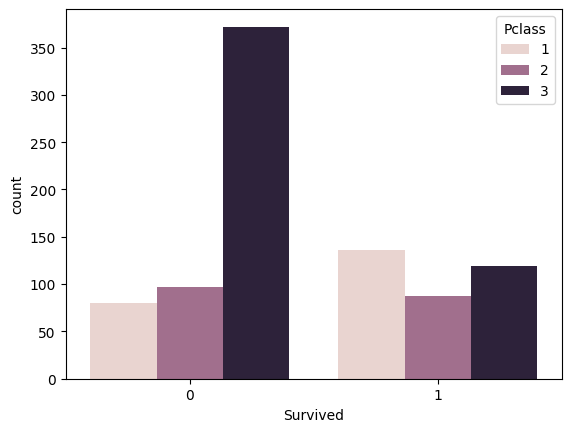

In [ ]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

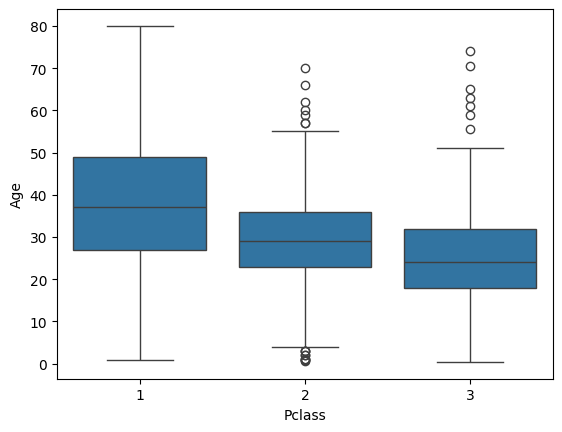

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

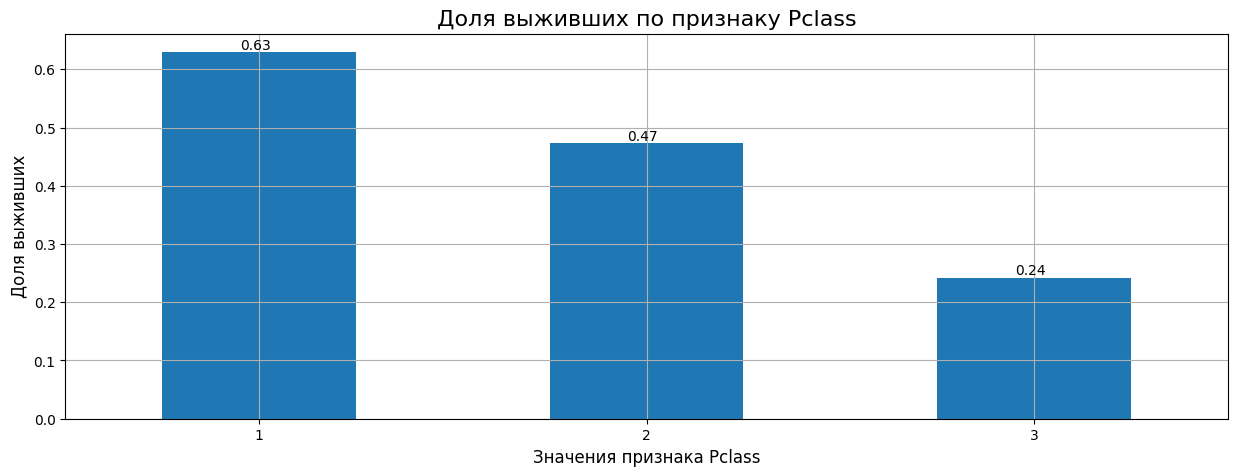

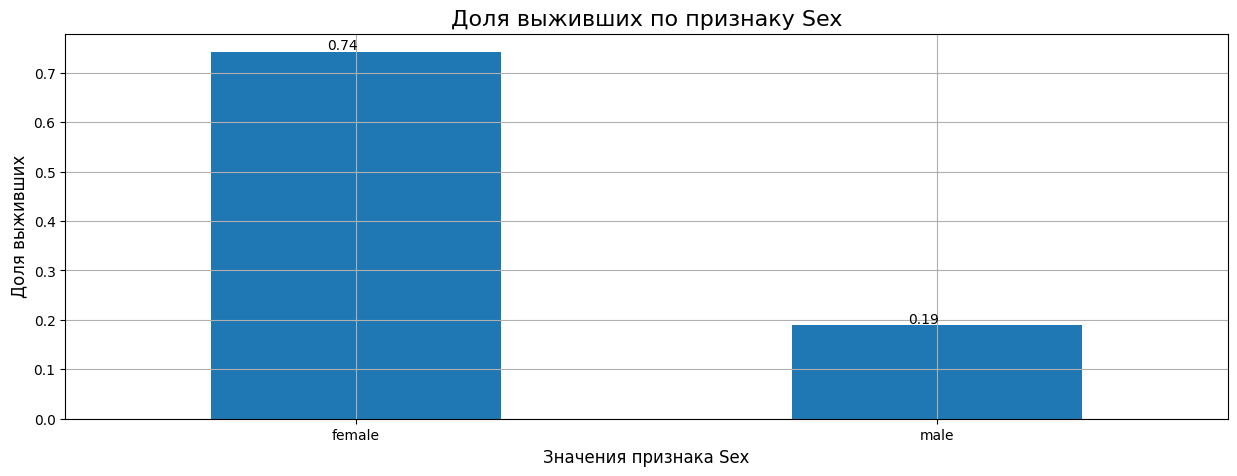

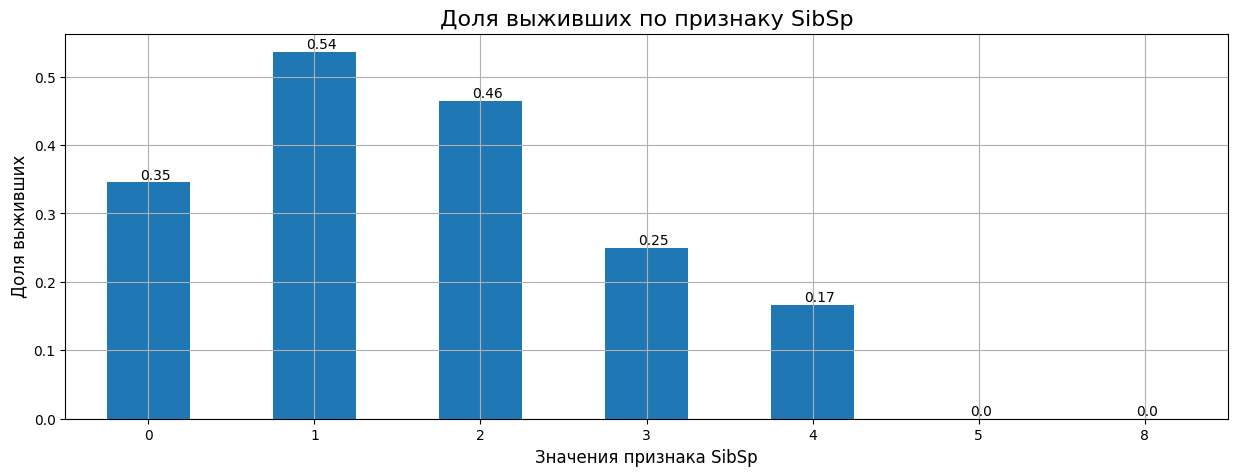

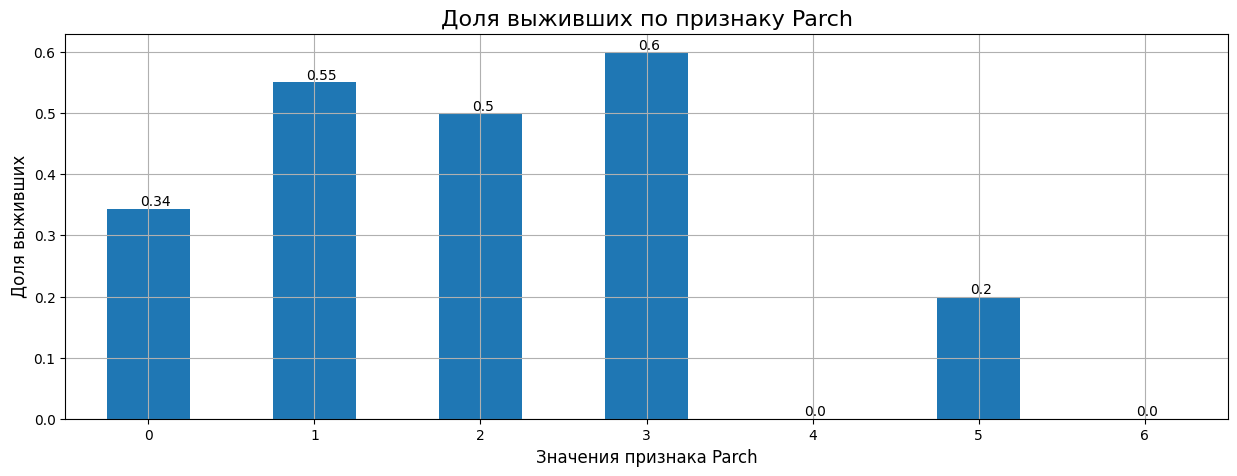

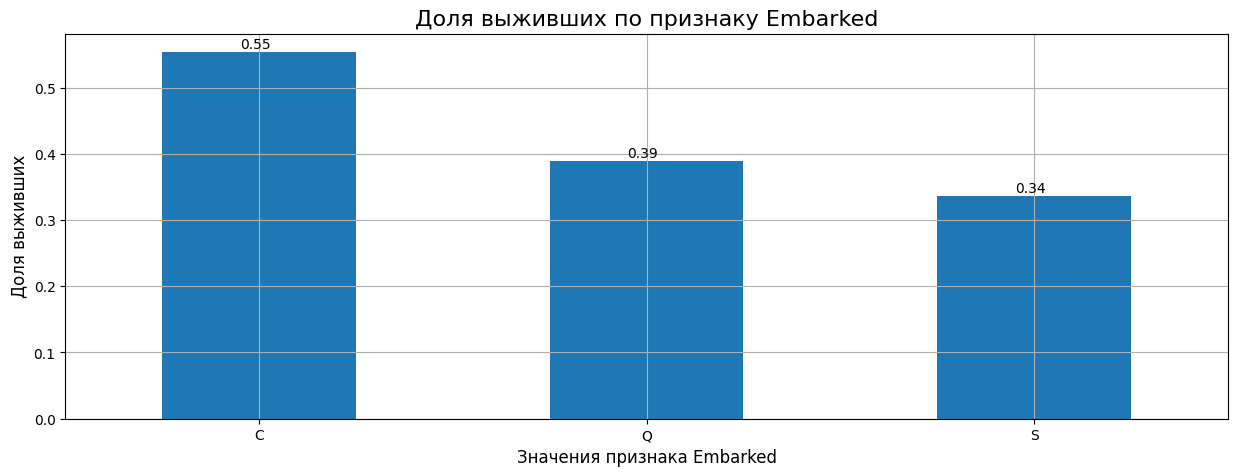

In [ ]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Исследование пропущенных значений
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

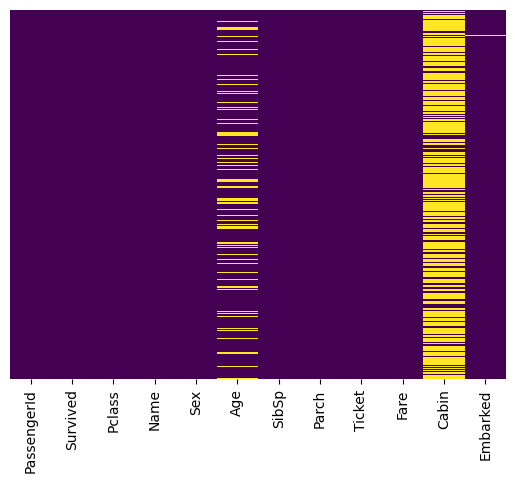

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# Визуализация представленых булевых значений (сможем увидеть где больше всего отсутствующих данных)
# Желтый цвет нам говорит о пропущенных значениях

In [ ]:
training_set.drop('Cabin', axis=1, inplace=True)

In [ ]:
training_set.dropna(inplace=True)

In [ ]:
# Преобразование категориальных признаков
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [ ]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
np.unique(cat_enc_le)

array([0, 1])

In [ ]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy

In [ ]:
training_set.shape

(712, 11)

In [ ]:
cat_enc_ohe.shape

(712, 3)

In [ ]:
pd.get_dummies(training_set['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [ ]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [ ]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [ ]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [ ]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [ ]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [ ]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


**Задания для самостоятельного выполнения**

1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [ ]:
# y - доля выживших (метки классов (выжил или нет))

In [ ]:
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']
X.head(3)

,Pclass,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True


In [ ]:
# Эти модели хорошо подходят для задач бинарной классификации, таких как предсказание выживания на Титанике.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7972027972027972


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print('Classification Report:n', report)

Classification Report:n               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:
3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

Доля выживших пассажиров: 0.40


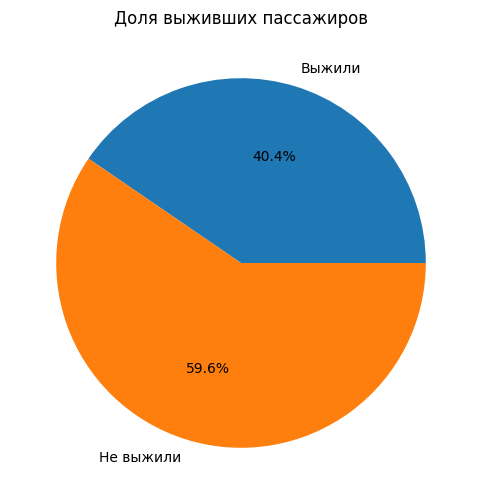

In [ ]:
# Вычисляем долю выживших пассажиров
# Survived: Признак, показывающий был ли спасен данный пассажир или нет.
# 1 означает, что удалось выжить, и 0 - не удалось спастись.
survived_rate = training_set['Survived'].mean()
print(f'Доля выживших пассажиров: {survived_rate:.2f}')

# Визуализируем долю выживших пассажиров
plt.figure(figsize=(6, 6))
plt.title('Доля выживших пассажиров')
plt.pie([survived_rate, 1-survived_rate], labels=['Выжили', 'Не выжили'], autopct='%1.1f%%')
plt.show()

In [ ]:
training_set = pd.read_csv('/content/titanic.csv')

Доля мужчин и женщин среди выживших:
Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


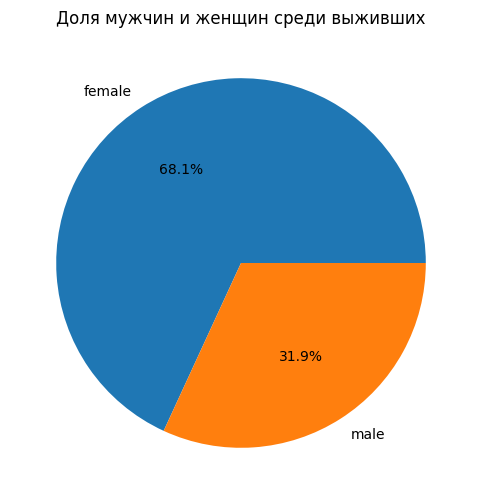

In [ ]:
# Вычисляем долю мужчин и женщин среди выживших
survived = training_set[training_set['Survived'] == 1]
survived_sex_rate = survived['Sex'].value_counts(normalize=True)
print('Доля мужчин и женщин среди выживших:')
print(survived_sex_rate)

# Визуализируем долю мужчин и женщин среди выживших
plt.figure(figsize=(6, 6))
plt.title('Доля мужчин и женщин среди выживших')
plt.pie(survived_sex_rate, labels=survived_sex_rate.index, autopct='%1.1f%%')
plt.show()

4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

Количество пассажиров в каждом классе:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Самый многолюдный класс:
3
Количество мужчин и женщин в классе 3:
Sex
male      347
female    144
Name: count, dtype: int64


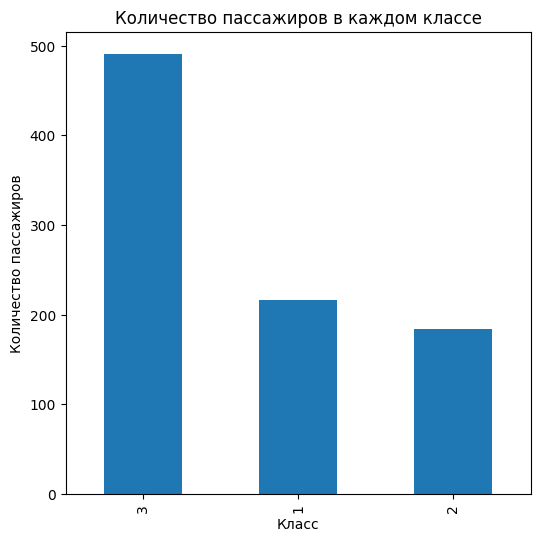

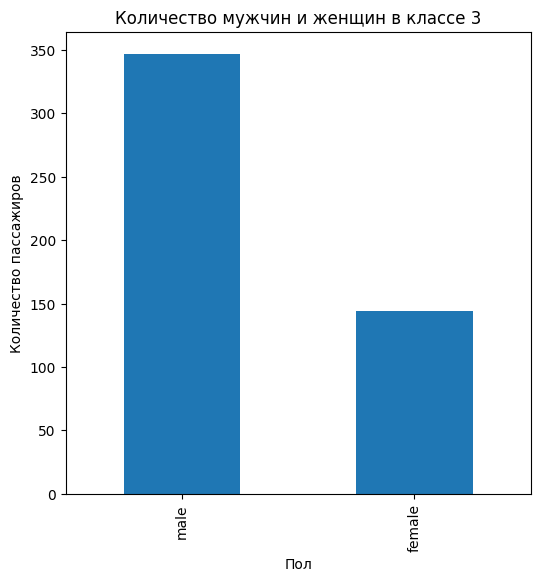

In [ ]:
# Вычисляем количество пассажиров в каждом классе
# Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
class_counts = training_set['Pclass'].value_counts()
print('Количество пассажиров в каждом классе:')
print(class_counts)

# Определяем самый многолюдный класс
most_populous_class = class_counts.idxmax()
print('Самый многолюдный класс:')
print(most_populous_class)

# Вычисляем количество мужчин и женщин в самом многолюдном классе
most_populous_class_sex_counts = training_set[training_set['Pclass'] == most_populous_class]['Sex'].value_counts()
print(f'Количество мужчин и женщин в классе {most_populous_class}:')
print(most_populous_class_sex_counts)

# Визуализируем количество пассажиров в каждом классе
plt.figure(figsize=(6, 6))
plt.title('Количество пассажиров в каждом классе')
class_counts.plot(kind='bar')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.show()

# Визуализируем количество мужчин и женщин в самом многолюдном классе
plt.figure(figsize=(6, 6))
plt.title(f'Количество мужчин и женщин в классе {most_populous_class}')
most_populous_class_sex_counts.plot(kind='bar')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.show()

5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [ ]:
training_set.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

Корреляция между ценой билета и возрастом пассажиров: 0.09606669176903888


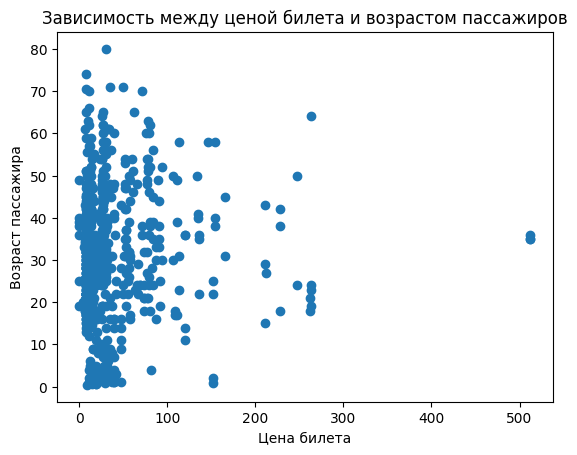

In [ ]:
# Расчет корреляции
correlation = training_set['Fare'].corr(training_set['Age'])
print(f'Корреляция между ценой билета и возрастом пассажиров: {correlation}')

# Построение диаграммы рассеяния
plt.scatter(training_set['Fare'], training_set['Age'])
plt.title('Зависимость между ценой билета и возрастом пассажиров')
plt.xlabel('Цена билета')
plt.ylabel('Возраст пассажира')
plt.show()

7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [ ]:
# Расчет среднего значения выживаемости для каждого уникального значения Fare и Pclass
average_survival_by_fare = training_set.groupby('Fare')['Survived'].mean()
average_survival_by_pclass = training_set.groupby('Pclass')['Survived'].mean()

print('Средняя выживаемость по цене билета:')
print(average_survival_by_fare)
print('Средняя выживаемость по классу билета:')
print(average_survival_by_pclass)

Средняя выживаемость по цене билета:
Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64
Средняя выживаемость по классу билета:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [ ]:
training_set = pd.read_csv('/content/titanic.csv')

In [ ]:
# Расчет статистик для всех пассажиров
min_fare = training_set['Fare'].min()
mean_fare = training_set['Fare'].mean()
max_fare = training_set['Fare'].max()

print(f'Для всех пассажиров:')
print(f'Минимальная стоимость билета: {min_fare}')
print(f'Средняя стоимость билета: {mean_fare}')
print(f'Максимальная стоимость билета: {max_fare}')

# Расчет статистик для пассажиров, которые сели на корабль в Саутгемптоне
southampton_passengers = training_set[training_set['Embarked'] == 'S']
min_fare_s = southampton_passengers['Fare'].min()
mean_fare_s = southampton_passengers['Fare'].mean()
max_fare_s = southampton_passengers['Fare'].max()

print('Для пассажиров, которые сели на корабль в Саутгемптоне:')
print(f'Минимальная стоимость билета: {min_fare_s}')
print(f'Средняя стоимость билета: {mean_fare_s}')
print(f'Максимальная стоимость билета: {max_fare_s}')

# Расчет среднего значения стоимости билета для каждого порта отправления
average_fare_by_embarkation = training_set.groupby('Embarked')['Fare'].mean()

print('\nСредняя стоимость билета по портам отправления:')
print(average_fare_by_embarkation)

Для всех пассажиров:
Минимальная стоимость билета: 0.0
Средняя стоимость билета: 32.204207968574636
Максимальная стоимость билета: 512.3292
Для пассажиров, которые сели на корабль в Саутгемптоне:
Минимальная стоимость билета: 0.0
Средняя стоимость билета: 27.079811801242233
Максимальная стоимость билета: 263.0

Средняя стоимость билета по портам отправления:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

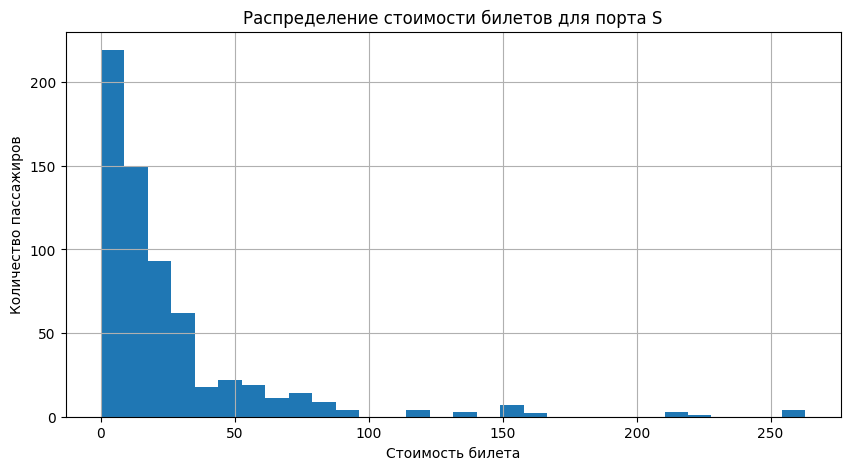

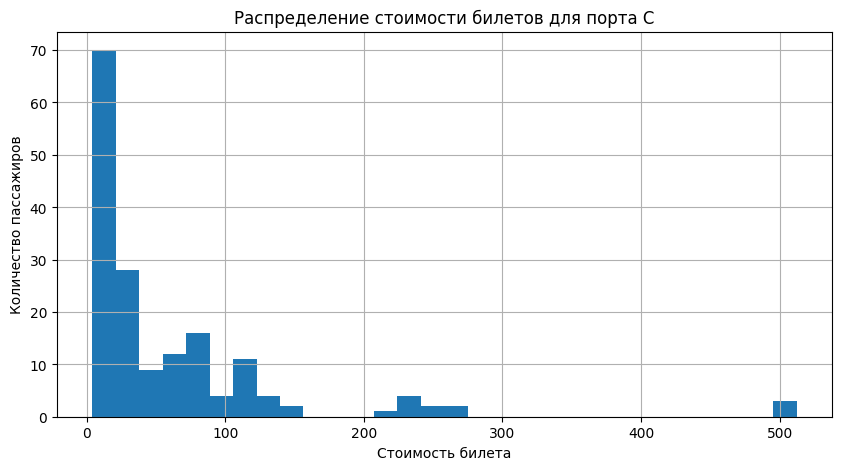

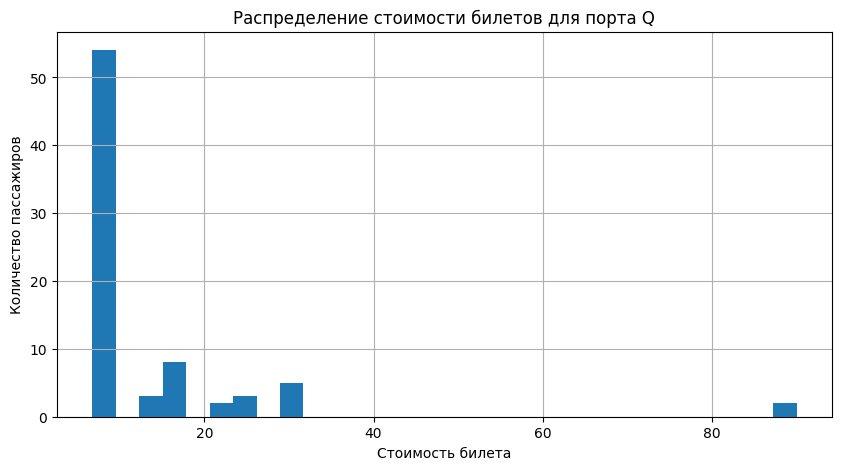

In [ ]:
# Создание гистограмм для каждого порта отправления
for port in training_set['Embarked'].unique():
    if pd.isna(port):
        continue
    plt.figure(figsize=(10, 5))
    training_set[training_set['Embarked'] == port]['Fare'].hist(bins=30)
    plt.title(f'Распределение стоимости билетов для порта {port}')
    plt.xlabel('Стоимость билета')
    plt.ylabel('Количество пассажиров')
    plt.show()

10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [ ]:
# Общее количество пассажиров в наборе данных
total_passengers_in_sample = len(training_set)
print(total_passengers_in_sample)

# Общее количество пассажиров на Титанике
total_passengers_on_titanic = 2224

# Расчет доли представленного набора данных от всей генеральной совокупности
sample_representativeness = total_passengers_in_sample / total_passengers_on_titanic

print(f'Доля представленного набора данных от всей генеральной совокупности: {sample_representativeness * 100}%')

# Вычисление количества выживших в наборе данных
survived_in_sample = training_set['Survived'].sum()

print(f'Количество выживших в наборе данных: {survived_in_sample}')

891
Доля представленного набора данных от всей генеральной совокупности: 40.06294964028777%
Количество выживших в наборе данных: 342


11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

In [ ]:
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']

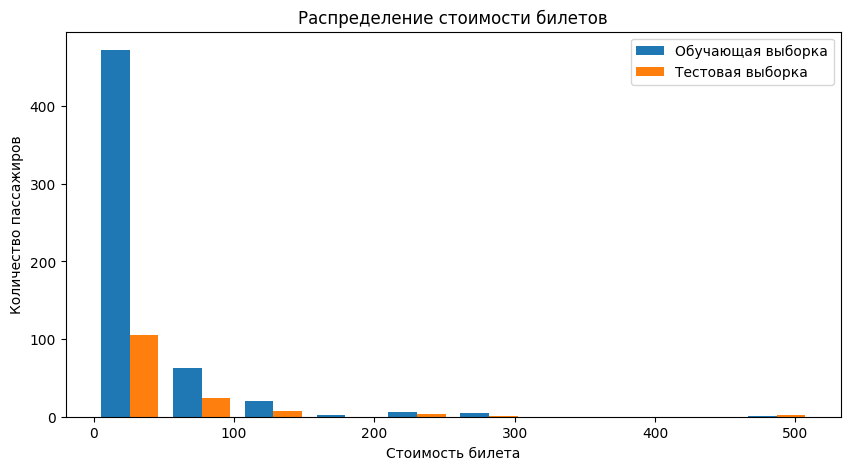

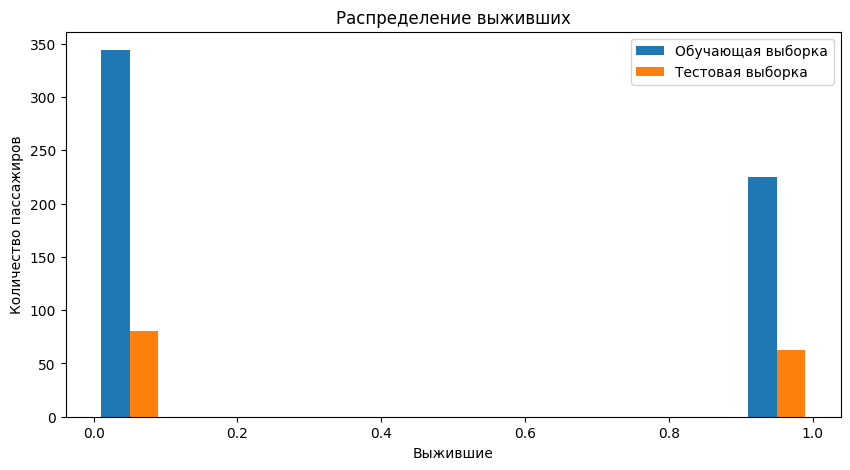

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist([X_train['Fare'], X_test['Fare']], label=['Обучающая выборка', 'Тестовая выборка'])
plt.title('Распределение стоимости билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist([y_train, y_test], label=['Обучающая выборка', 'Тестовая выборка'])
plt.title('Распределение выживших')
plt.xlabel('Выжившие')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

12. Сбалансируйте классы в исходном датасете двумя способами:
13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [ ]:
# мажоритарный класс - это класс в наборе данных, который представлен большим количеством образцов по сравнению с другими классами.
# миноритарный класс - это класс, который представлен меньшим количеством образцов.

In [ ]:
# Определение мажоритарного и миноритарного классов
majority_class = training_set[training_set['Survived'] == 0]
minority_class = training_set[training_set['Survived'] == 1]

# метод sample() библиотеки pandas для случайного выбора подмножества данных из мажоритарного класса
# n - определяет количество случайных элементов, которые нужно выбрать
# Удаление случайных объектов из мажоритарного класса
majority_class_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

# Объединение миноритарного класса и уменьшенного мажоритарного класса
balanced_training_set = pd.concat([minority_class, majority_class_downsampled])

# Проверка баланса классов
print(balanced_training_set['Survived'].value_counts())

Survived
1    342
0    342
Name: count, dtype: int64


14. Добавьте в выборку дубликаты миноритарного класса.

In [ ]:
# Определение мажоритарного и миноритарного классов
majority_class = training_set[training_set['Survived'] == 0]
minority_class = training_set[training_set['Survived'] == 1]

# Параметр replace=True позволяет выбирать один и тот же элемент несколько раз
# Добавление дубликатов миноритарного класса
minority_class_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Объединение мажоритарного класса и увеличенного миноритарного класса
balanced_training_set = pd.concat([majority_class, minority_class_upsampled])

# Проверка баланса классов
print(balanced_training_set['Survived'].value_counts())

Survived
0    549
1    549
Name: count, dtype: int64


15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [ ]:
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели и предсказание на тестовой выборке
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']
X = X.fillna(X.mean())

In [ ]:
# Балансировка классов путем добавления дубликатов миноритарного класса
minority_class_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
balanced_training_set = pd.concat([majority_class, minority_class_upsampled])

# Определение атрибутов и целевой переменной после балансировки
X_balanced = balanced_training_set.drop('Survived', axis=1)
y_balanced = balanced_training_set['Survived']
X_balanced.drop('Cabin', axis=1, inplace=True)


# Разделение данных на обучающую и тестовую выборки после балансировки
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_balanced =  X_train_balanced.fillna(X_train_balanced.mean())
X_test_balanced = X_test_balanced.fillna(X_test_balanced.mean())

# Обучение модели и предсказание на тестовой выборке после балансировки
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)
predictions_balanced = model_balanced.predict(X_test_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Эффективность модели до балансировки классов:')
print(classification_report(y_test, predictions))
print()
print('Эффективность модели после балансировки классов:')
print(classification_report(y_test_balanced, predictions_balanced))

Эффективность модели до балансировки классов:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143


Эффективность модели после балансировки классов:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       119
           1       0.80      0.66      0.72       101

    accuracy                           0.77       220
   macro avg       0.77      0.76      0.76       220
weighted avg       0.77      0.77      0.77       220



16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

<Axes: >

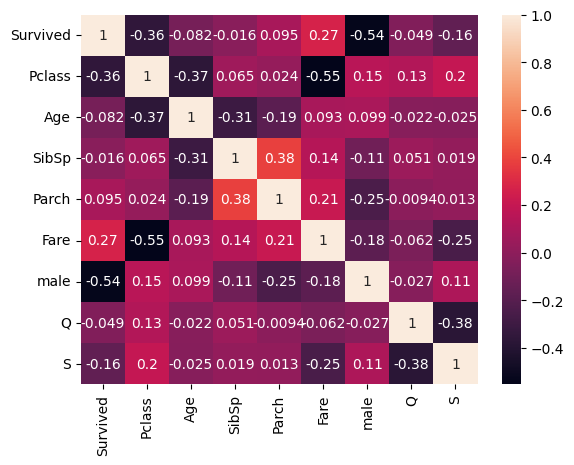

In [ ]:
sns.heatmap(training_set.corr(), annot = True)

17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

In [ ]:
def age_category(age):
    if age < 18:
        return 'ребенок'
    elif age >= 18 and age < 60:
        return 'взрослый'
    else:
        return 'старик'

# новый признак "возрастная категория"
training_set['возрастная категория'] = training_set['Age'].apply(age_category)

# Группируем данные по возрастной категории и подсчитываем количество пассажиров в каждой категории
age_category_counts = training_set.groupby('возрастная категория').size()

print('Количество пассажиров в каждой возрастной категории:')
print(age_category_counts)

Количество пассажиров в каждой возрастной категории:
возрастная категория
взрослый    574
ребенок     113
старик       25
dtype: int64


In [ ]:
# Определение атрибутов и целевой переменной
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'возрастная категория']]
y = training_set['Survived']

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели и предсказание на тестовой выборке
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Оценка эффективности модели
print('Эффективность модели с признаком "возрастная категория":')
print(classification_report(y_test, predictions))

Эффективность модели с признаком "возрастная категория":
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        80
           1       0.81      0.68      0.74        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
